#*TREINANDO ACESSO DE PLANILHAS*

# Planilhas ML Vecol

## Acessando com Pandas


In [ ]:
import pandas as pd
# abrindo a planilha de Janeiro e printando a tabela no formato do Pandas
planilha = pd.read_excel('ML e PIX - Janeiro 2023.xlsx')
display(planilha)

In [ ]:
# Selecionando a coluna de valores de compras da tabela
valor_compras = planilha['Unnamed: 5']
print(valor_compras)

In [ ]:
from math import isnan
from statistics import mean

# adicionando os valores de compras na lista valores[]
valores = []
for i in valor_compras:
  valores.append(i)

# filtrando os valores da lista somente pelos numeros
# aqui utilizamos o 'isinstance' para selecionar as instancias que são 
# somente ints e floats
valores_filtrado = list(filter(lambda i: isinstance(i, (int, float)), valores))
valores_filtrado = list(filter(lambda i: not isnan(i), valores_filtrado))
valores_filtrado.remove(valores_filtrado[-1])

# fazendo a media e soma das compras
media_compras = round(mean(valores_filtrado), 2)
total_compras = sum(valores_filtrado)

print(f'ML VECOL JANEIRO\nmedia de compras: {media_compras}\nvalor total de compras: {total_compras}')

Capturando agora a da planilha de Fevereiro, com código mais enxuto

In [11]:
planilha_fev = pd.read_excel('ML e PIX - Fevereiro 2023.xlsx')
valor_compras_fev = planilha_fev['Unnamed: 5']

# adicionando os valores de compras na lista valores[]
valores = []
for i in valor_compras_fev:
  valores.append(i)

# filtrando os valores da lista somente pelos numeros
valores_filtrado = list(filter(lambda i: isinstance(i, (int, float)) and not isnan(i), valores))
valores_filtrado.remove(valores_filtrado[-1])

# fazendo a media e soma das compras
media_compras2 = round(mean(valores_filtrado), 2)
total_compras2 = sum(valores_filtrado)
print(f'ML VECOL FEVEREIRO\nmedia de compras: {round(media_compras2, 2)}\nvalor total de compras: {total_compras2}')

ML VECOL FEVEREIRO
media de compras: 367.15
valor total de compras: 7343.08


---

## Usando o openpyxl

In [ ]:
!pip install openpyxl

In [ ]:
from openpyxl import load_workbook
from traitlets.traitlets import validate
import csv

planilhas = load_workbook('ML e PIX - Janeiro 2023.xlsx')
planilha = planilhas.active


# Planilha de Crédito de banco

In [1]:
# acessando planilha e verificando as informações disponiveis nela
import pandas as pd
planilha = pd.read_excel('credito.xlsx')
planilha.head(3)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20


## Exercicio 1

 Qual é a média de idade dos clientes do sexo masculino que possuem um cartão do tipo "blue"?

In [ ]:
from statistics import mean
dt_sexo = planilha['sexo']
dt_cartao = planilha['tipo_cartao']
dt_idade = planilha['idade']

idades_mblue = []
for i,c,s in zip(dt_idade,dt_cartao,dt_sexo):
  if s == 'M' and c == 'blue':
    idades_mblue.append(i)

media_idades_mblue = round(mean(idades_mblue))
print(f'média de idades dos homens com cartão Blue: {media_idades_mblue} anos')

## Exercicio 2

---
Qual é a porcentagem de clientes inadimplentes (default = 1) em cada faixa salarial (salario_anual)?

In [73]:
# definindo as colunas a serem analisadas
dt_salario_anual = planilha['salario_anual']
dt_default = planilha['default']

# vendo quais sao todos os tipos de salarios da planilha antes de filtrá-los
# tipos_salarios = []
# for linha in dt_salario_anual:
  # tipos_salarios.append(linha)
# tipos_salarios = list(set(tipos_salarios))
# print(tipos_salarios)

In [74]:
# contando a quantidade de clientes em cada faixa salarial e armazenando nas variaveis
client_40 = 0
client_60 = 0
client_80 = 0
client_120 = 0
client_mais120 = 0
client_na = 0
for s in dt_salario_anual:
  if s == 'menos que $40K': client_40 = client_40 + 1
  elif s == '$40K - $60K': client_60 = client_60 + 1
  elif s == '$60K - $80K': client_80 = client_80 + 1
  elif s == '$80K - $120K': client_120 = client_120 + 1
  elif s == '$120K +': client_mais120 = client_mais120 + 1
  elif s == 'na': client_na = client_na + 1

# contando e armazenando a quantidade de inadimplentes em cada faixa salarial
inadimplent_40 = 0
inadimplent_60 = 0
inadimplent_80 = 0
inadimplent_120 = 0
inadimplent_mais120 = 0
inadimplent_na = 0
for s,d in zip(dt_salario_anual,dt_default):
  if s == 'menos que $40K' and d == 1: inadimplent_40 = inadimplent_40 + 1
  elif s == '$40K - $60K' and d == 1: inadimplent_60 = inadimplent_60 + 1
  elif s == '$60K - $80K' and d == 1: inadimplent_80 = inadimplent_80 + 1
  elif s == '$80K - $120K' and d == 1: inadimplent_120 = inadimplent_120 + 1
  elif s == '$120K +' and d == 1: inadimplent_mais120 = inadimplent_mais120 + 1
  elif s == 'na' and d == 1: inadimplent_na = inadimplent_na + 1

# print(f'quantidade de registros no banco: {len(dt_salario_anual)}')
# print(f'quantidade de clientes por salario:\nAte 40K: {client_40}\nEntre 40-60K: {client_60}\nEntre 60-80K: {client_80}\nEntre 80-120K: {client_120}\nMais de 120K: {client_mais120}\nNA: {client_na}')

In [75]:
# funçao de calculo de porcentagem
def porcentagem(menor,maior) -> float:
  result = (float(menor)/float(maior)) *100
  return str(round(result,2))+'%' 

print(f'porcentagem de inadimplentes do banco total:                   {porcentagem(1627,10127)}\n---------------------------------------------------')
print(f'porcentagem de inadimplentes - salario ate 40K anual:    {porcentagem(inadimplent_40,client_40)}')
print(f'porcentagem de inadimplentes - salario de 40-60K anual:  {porcentagem(inadimplent_60,client_60)}')
print(f'porcentagem de inadimplentes - salario de 60-80K anual:  {porcentagem(inadimplent_80,client_80)}')
print(f'porcentagem de inadimplentes - salario de 80-120K anual: {porcentagem(inadimplent_120,client_120)}')
print(f'porcentagem de inadimplentes - salario de +120K anual:   {porcentagem(inadimplent_mais120,client_mais120)}')
print(f'porcentagem de inadimplentes - salario não informado:    {porcentagem(inadimplent_na,client_na)}')

porcentagem de inadimplentes do banco total:                   16.07%
---------------------------------------------------
porcentagem de inadimplentes - salario ate 40K anual:    17.19%
porcentagem de inadimplentes - salario de 40-60K anual:  15.14%
porcentagem de inadimplentes - salario de 60-80K anual:  13.48%
porcentagem de inadimplentes - salario de 80-120K anual: 15.77%
porcentagem de inadimplentes - salario de +120K anual:   17.33%
porcentagem de inadimplentes - salario não informado:    16.82%


Gerando um gráfico da porcentagem dos inadimplentes em cada faixa salarial \
*dica do ChatGPT*

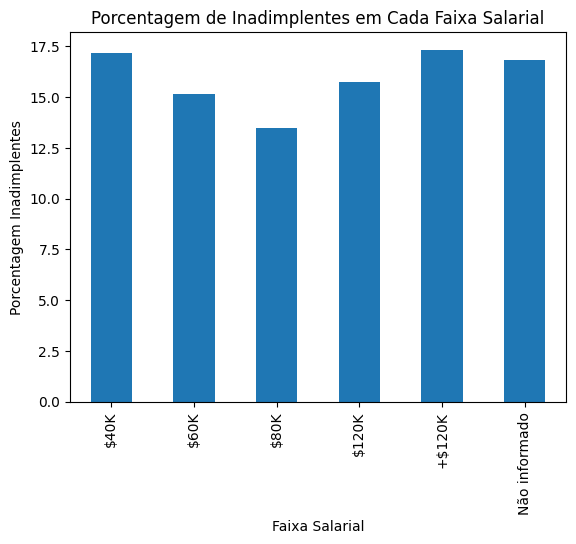

In [69]:
import matplotlib.pyplot as plt

# Dados para o gráfico
faixas_salariais = ['$40K', '$60K', '$80K', '$120K', '+$120K', 'Não informado']
porcentagens_inadimplentes = [inadimplent_40/client_40 * 100,
                              inadimplent_60/client_60 * 100,
                              inadimplent_80/client_80 * 100,
                              inadimplent_120/client_120 * 100,
                              inadimplent_mais120/client_mais120 * 100,
                              inadimplent_na/client_na * 100]

# Criando o DataFrame para o gráfico
df_grafico = pd.DataFrame({'Faixa Salarial': faixas_salariais, 'Porcentagem Inadimplentes': porcentagens_inadimplentes})

# Plotando o gráfico de barras
ax = df_grafico.plot(x='Faixa Salarial', y='Porcentagem Inadimplentes', kind='bar', legend=False)
ax.set_ylabel('Porcentagem Inadimplentes')
ax.set_title('Porcentagem de Inadimplentes em Cada Faixa Salarial')

# Exibindo o gráfico
plt.show()

## Exercicio 3

---
Extraindo as idades e os salários anuais dos inadimplentes \
por fim, gerando o arquivo csv das informações

In [11]:
# selecionando as colunas que eu quero trabalhar
dt_default = planilha['default']
dt_idade = planilha['idade']
dt_salario_anual = planilha['salario_anual']
defaults = []
idades = []
salarios = []

# adicionando nas listas somente a idade e salarios anuais dos inadimplentes
for i, j, k in zip(dt_default, dt_idade, dt_salario_anual):
  if i != 0:
    defaults.append(i)
    idades.append(j)
    salarios.append(k)

In [12]:
import csv
from statistics import mean

# usando o metodo translate() para filtrar somente os numeros e retirar os 'na'
salario_filtrado2 = []
salarios_filtrado1 = list(filter(lambda i: i != 'na', salarios))
for i in salarios_filtrado1:
  traducao = i.translate(str.maketrans('','', '$K+menos que '))
  salario_filtrado2.append(traducao)

# trazendo a média de valores nao definidos (exemplo: 60-80)
salario_anual = []
for i in salario_filtrado2:
  if i == '60-80':
    # usando metodos replace() na troca
    numero = i.replace('60-80',f'{mean([60,80])}')
    salario_anual.append(numero)
  elif i == '80-120':
    numero = i.replace('80-120',f'{mean([80,120])}')
    salario_anual.append(numero)
  elif i == '40-60':
    numero = i.replace('40-60',str(mean([40,60])))
    salario_anual.append(numero)
  else: salario_anual.append(i)

# escrevendo arquivo .csv com as idades e salarios anuais
with open('inadimplentes.csv','w', encoding='utf8') as fp:
  escrever = csv.writer(fp)
  z = zip(idades, salario_anual)
  escrever.writerow(['IDADE', 'SALARIO ANUAL'])
  escrever.writerows(z)

print('inadimplentes.csv GERADO')

inadimplentes.csv GERADO


---

# Estudos

In [ ]:
# Dados fictícios de exemplo
dados = {
    'Produto': ['A', 'A', 'B', 'B'],
    'Ano': [2019, 2020, 2019, 2020],
    'Vendas': [100, 150, 200, 180]
}

# Cria um DataFrame a partir dos dados
df = pd.DataFrame(dados)
print(df.to_string(index=False))